# ML Mini Project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
data= pd.read_csv('suicide.csv')
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [2]:
data.drop(columns=['country', 'year', 'sex', 'age', 'country-year','generation'], inplace=True)
data[' gdp_for_year ($) '] = data[' gdp_for_year ($) '].str.replace(',', '')
data[' gdp_for_year ($) '] = data[' gdp_for_year ($) '].astype(np.int64)

In [3]:
data.dropna(inplace=True)

In [4]:
data.isnull().sum()

suicides_no           0
population            0
suicides/100k pop     0
HDI for year          0
 gdp_for_year ($)     0
gdp_per_capita ($)    0
dtype: int64

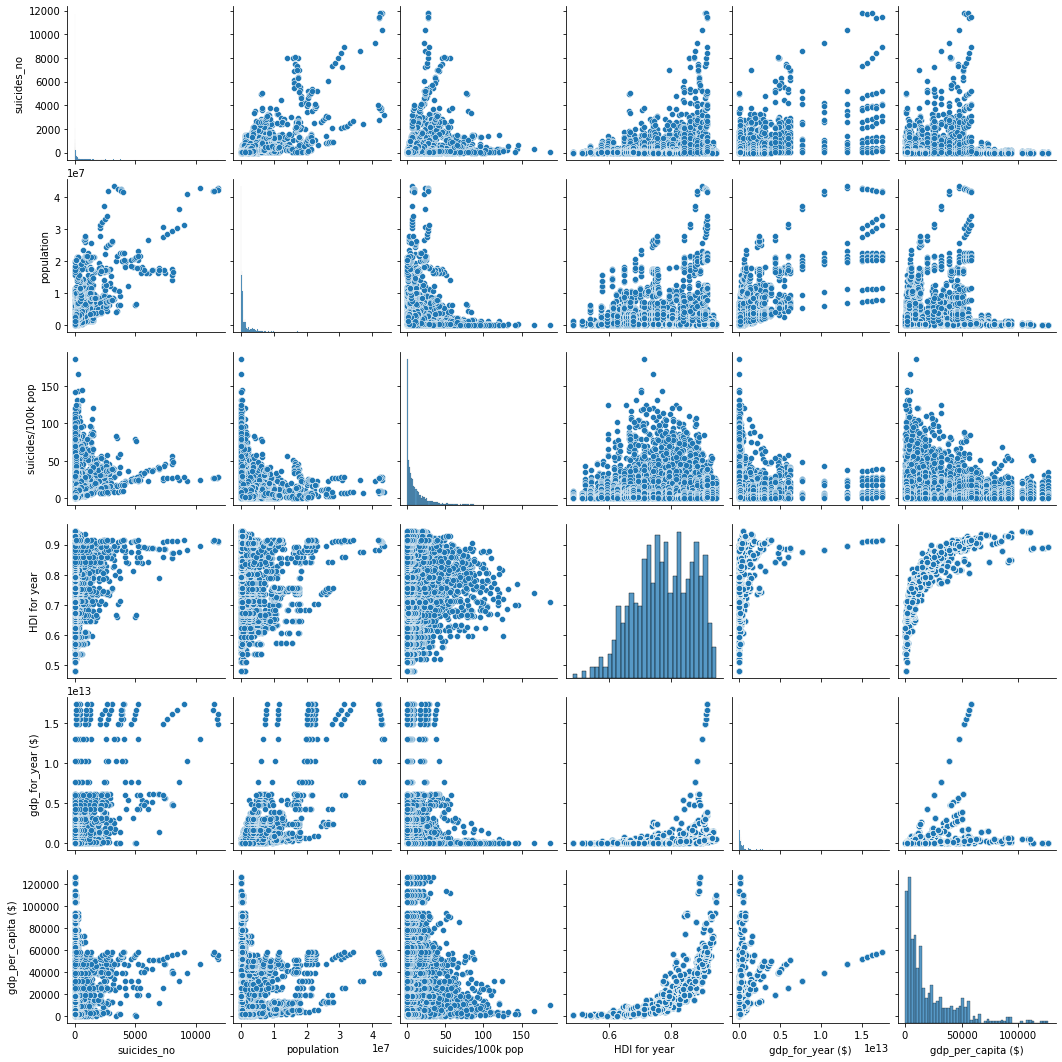

In [5]:
import seaborn as sns
sns.pairplot(data)

In [6]:
import sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split
X= data.drop(labels = ['suicides_no'],axis = 1)
Y=data.iloc[:,:1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
print(X_train.shape)
print(X_test.shape)

(5854, 5)
(2510, 5)


In [7]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=10, random_state=0,shuffle=True)

In [8]:
from sklearn.tree import DecisionTreeClassifier
cv_result = cross_val_score(DecisionTreeClassifier(),X_train,Y_train.values.ravel(), cv = kfold,scoring = "accuracy")
res_DecisionTreeClassifier=cv_result.mean()*100

In [9]:
from sklearn.neural_network import MLPClassifier
cv_result = cross_val_score(MLPClassifier(hidden_layer_sizes=(45,30,15),solver='sgd',learning_rate_init=0.01,max_iter=500)
                ,X_train,Y_train.values.ravel(), cv = kfold,scoring = "accuracy")
res_MLPClassifier=cv_result.mean()*100

In [10]:
from sklearn.naive_bayes import GaussianNB
cv_result = cross_val_score(GaussianNB(),X_train,Y_train.values.ravel(), cv = kfold,scoring = "accuracy")
res_GaussianNB=cv_result.mean()*100

In [11]:
from sklearn.ensemble import RandomForestClassifier
cv_result = cross_val_score(RandomForestClassifier(n_estimators=7)
                            ,X_train,Y_train.values.ravel(), cv = kfold,scoring = "accuracy")
res_RandomForestClassifier=cv_result.mean()*100

In [12]:
print("Accuracy of Decision Tree Classifier is : "+str(res_DecisionTreeClassifier)+"%")
print("Accuracy of MLP Classifier is : "+str(res_MLPClassifier)+"%")
print("Accuracy of Naive Bayes - Gaussian is : "+str(res_GaussianNB)+"%")
print("Accuracy of Random Forest Classifier is : "+str(res_RandomForestClassifier)+"%")

Accuracy of Decision Tree Classifier is : 36.164143403051256%
Accuracy of MLP Classifier is : 13.717540328461828%
Accuracy of Naive Bayes - Gaussian is : 13.273387590793734%
Accuracy of Random Forest Classifier is : 27.998483124762984%
